In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('placement.csv')
print(df.head(10)) # First 10 Data

   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0
5           5   7.1   48.0          1
6           6   5.7  143.0          0
7           7   5.0   63.0          0
8           8   6.1  156.0          0
9           9   5.1   66.0          0


In [6]:
print(df.info())
# Shows a summary of the DataFrame, including column names, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None


In [7]:
print(df.shape)

(100, 4)



# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [8]:
df = df.iloc[:,1:]
print(df)

    cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]


In [9]:
import matplotlib.pyplot as plt

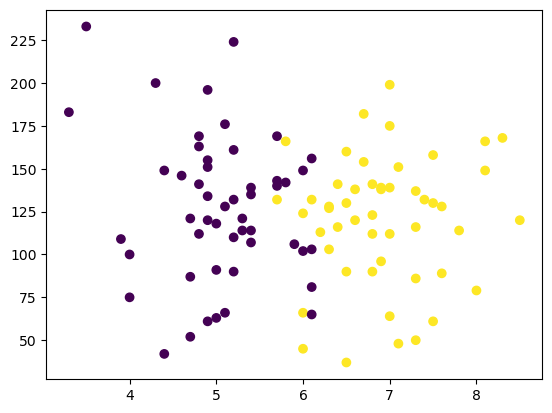

In [10]:
plt.scatter(df["cgpa"],df["iq"], c=df["placement"])
plt.show()

In [11]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

print(x)
print()
print(y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1)

In [13]:
print(X_train)

    cgpa     iq
67   5.0  118.0
82   6.5   37.0
62   6.0  102.0
20   6.6  120.0
57   6.5  130.0
..   ...    ...
54   6.4  141.0
95   4.3  200.0
48   6.6  138.0
85   5.8  166.0
4    5.8  142.0

[90 rows x 2 columns]


In [14]:
print(X_test)

    cgpa     iq
94   4.7   52.0
66   6.9   96.0
8    6.1  156.0
41   5.4  114.0
56   6.1   65.0
98   6.3  103.0
51   4.8  141.0
50   3.5  233.0
42   7.6   89.0
0    6.8  123.0


In [15]:
print(Y_train)

67    0
82    1
62    0
20    1
57    1
     ..
54    1
95    0
48    1
85    1
4     0
Name: placement, Length: 90, dtype: int64


In [16]:
print(Y_test)

94    0
66    1
8     0
41    0
56    0
98    1
51    0
50    0
42    1
0     1
Name: placement, dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
print(X_train)

[[-0.89109554 -0.16325234]
 [ 0.43231368 -2.26591947]
 [-0.00882273 -0.578594  ]
 [ 0.52054096 -0.11133464]
 [ 0.43231368  0.1482539 ]
 [ 2.19685929 -0.11133464]
 [ 2.02040473  1.13469033]
 [-0.97932282  1.86153822]
 [-1.0675501   1.00489606]
 [-0.62641369 -0.08537578]
 [-1.42045922  0.64147211]
 [ 0.60876824  0.77126638]
 [-0.80286825  0.09633619]
 [-1.77336834 -0.63051171]
 [ 0.43231368  0.9270195 ]
 [ 1.75572289 -1.17564763]
 [ 0.69699552 -0.89010024]
 [-0.27350457  1.16064918]
 [-1.0675501   1.16064918]
 [ 1.40281376  0.09633619]
 [-1.86159562 -0.39688203]
 [ 1.13813192 -0.99393565]
 [-0.53818641  0.27804816]
 [-0.89109554 -0.86414139]
 [-1.15577738 -0.08537578]
 [ 0.07940455  0.2001716 ]
 [ 0.7852228   0.35592472]
 [ 0.69699552 -0.31900547]
 [-0.53818641  0.38188358]
 [-0.71464097  0.2001716 ]
 [-0.27350457  0.48571899]
 [-0.97932282  0.79722523]
 [-0.71464097 -0.89010024]
 [ 0.7852228   0.38188358]
 [-1.15577738 -0.9679768 ]
 [ 0.43231368 -0.89010024]
 [ 1.31458648 -1.64290699]
 

In [19]:
X_test = scaler.transform(X_test)
print(X_test)

[[-1.15577738 -1.87653667]
 [ 0.7852228  -0.73434712]
 [ 0.07940455  0.82318409]
 [-0.53818641 -0.26708776]
 [ 0.07940455 -1.53907158]
 [ 0.25585911 -0.55263515]
 [-1.0675501   0.43380128]
 [-2.21450475  2.8220158 ]
 [ 1.40281376 -0.91605909]
 [ 0.69699552 -0.03345808]]


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression()

In [22]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [23]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 0 0 1 1]


In [24]:
print(Y_test)

94    0
66    1
8     0
41    0
56    0
98    1
51    0
50    0
42    1
0     1
Name: placement, dtype: int64


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8

In [28]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

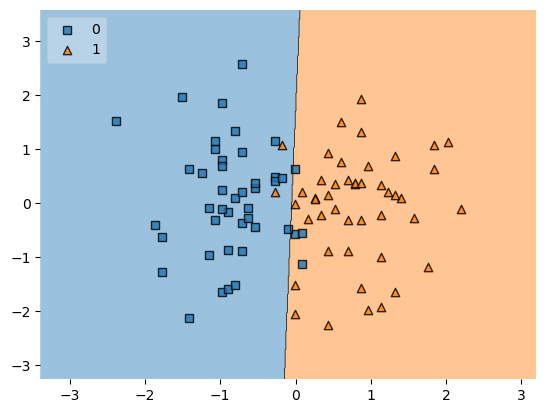

In [29]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [30]:
import pickle

In [32]:
with open("model.pkl", "wb") as file:
    pickle.dump(clf, file)